# 作业1：Numpy练习

本次作业主要对Python中的矩阵运算库Numpy进行练习。如遇到不清楚的函数或主题，可以查阅[官方文档](https://numpy.org/doc/stable/user/index.html)或利用搜索引擎寻求帮助。

### 基础知识

本节对Numpy进行简要介绍，没有实际的题目，可直接运行每一个单元格。

首先导入Numpy包：

In [3]:
import numpy as np

利用Numpy可以方便地创建向量和矩阵：

In [2]:
vec = np.array([1.0, 2.0, 5.0])
print(vec)

[1. 2. 5.]


In [3]:
mat = np.array([[1.0, 2.0, 2.0], [3.0, 5.0, 4.5]])
print(mat)

[[1.  2.  2. ]
 [3.  5.  4.5]]


In [4]:
vec = np.linspace(start=1.0, stop=5.0, num=12)
print(vec)

[1.         1.36363636 1.72727273 2.09090909 2.45454545 2.81818182
 3.18181818 3.54545455 3.90909091 4.27272727 4.63636364 5.        ]


In [5]:
mat = np.reshape(vec, (3, 4))
print(mat)

[[1.         1.36363636 1.72727273 2.09090909]
 [2.45454545 2.81818182 3.18181818 3.54545455]
 [3.90909091 4.27272727 4.63636364 5.        ]]


Python中下标是从0开始的，请一定要记住这一点，否则会造成很多逻辑错误。

In [6]:
print(vec[0])
print(vec[2])
print(mat[1, 1])

1.0
1.7272727272727273
2.8181818181818183


负数的下标表示从尾部往前数：

In [7]:
print(vec[-1])
print(vec[-2])
print(mat[1, -1])

5.0
4.636363636363637
3.5454545454545454


可以用冒号选取向量中的一段范围，格式为`x[start:end]`，选出的元素包含`x[start]`，不包含`x[end]`。

In [8]:
print(vec[1:3])

[1.36363636 1.72727273]


In [9]:
print(mat[:, :2])

[[1.         1.36363636]
 [2.45454545 2.81818182]
 [3.90909091 4.27272727]]


在编写函数时，经常需要各种测试数据，此时可以用Numpy来生成各类随机数。在需要用到随机数之前，一定要先设置随机数种子，以使结果可重复。

In [10]:
np.random.seed(123)

生成均匀分布随机数：

In [12]:
unif = np.random.uniform(low=0.0, high=1.0, size=5)
print(unif)

[0.42310646 0.9807642  0.68482974 0.4809319  0.39211752]


正态分布随机数：

In [13]:
norm = np.random.normal(loc=0.0, scale=1.0, size=(2, 5))
print(norm)

[[ 1.26593626 -0.8667404  -0.67888615 -0.09470897  1.49138963]
 [-0.638902   -0.44398196 -0.43435128  2.20593008  2.18678609]]


Numpy提供了许多数学函数对向量和矩阵进行操作：

In [14]:
print(np.exp(norm))

[[3.54641154 0.42031939 0.5071816  0.90963763 4.44326571]
 [0.52787171 0.64147699 0.6476847  9.07869158 8.90654223]]


In [15]:
print(np.log(unif))

[-0.86013145 -0.01942322 -0.37858503 -0.7320296  -0.93619369]


也可以对向量和矩阵进行汇总：

In [16]:
np.sum(unif)

2.961749816772451

In [17]:
np.mean(norm)

0.39924713017557834

汇总可以按行或者按列进行，这由`axis`参数决定。0表示运算时第一个维度（行）在变化，1表示运算时第二个维度（列）在变化。
再次提醒，Python中以0表示第一个元素！

In [19]:
np.mean(norm, axis=0)  # 对第一个维度（行标在变化）求均值

array([ 0.31351713, -0.65536118, -0.55661871,  1.05561056,  1.83908786])

In [20]:
np.var(norm, axis=1)  # 对第二个维度（列标在变化）求方差

array([0.95967985, 1.75769191])

### 第1题

(a) 生成10000个服从(0, 1)间均匀分布的随机数，赋值给变量`x`，并打印其**前10个**元素。

In [23]:
x = np.random.uniform(low=0.0, high=1.0, size=10000)
print(x[0:10])

[0.74581758 0.78373487 0.51355382 0.54889301 0.60866522 0.72825649
 0.59596236 0.08400015 0.10102637 0.30738087]


(b) 创建向量`y`，令其在数学上等于`y=-log(x)`，其中`log`为自然对数。打印`y`的**最后10个**元素。

In [37]:
y = -np.log(x)
print(y[-10:])

[2.42123934 0.41541317 0.01896608 0.18965739 0.05997996 0.96702998
 0.46209125 0.62873196 0.591033   0.06921105]


(c) 查找在Python中绘制图形的方法，绘制`y`的直方图。

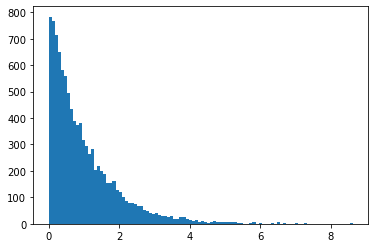

In [48]:
import matplotlib.pyplot as plt
plt.hist(y, bins=100)
plt.show()

(d) 猜测或证明`y`服从什么分布，并简要说明理由。

答：P(Y<y) = P(-log(X)<y) = P(X<e^(-y)) = e^(-y),所以Y服从指数分布Y~EXP(1)。

### 第2题

(a) 考虑Sigmoid函数 $$\sigma(x)=\frac{e^x}{1+e^x}$$

请在Python中编写一个函数`sigmoid(x)`，令其可以接收一个向量`x`，返回Sigmoid函数在`x`上的取值。

In [4]:
def sigmoid(x):
    return np.exp(x)/(1+np.exp(x))

(b) 创建向量`x`，使其包含元素-1000, -100, -10, 0, 10, 100, 1000。在`x`上调用上面编写的函数，返回的结果是什么？是否出现警告或错误？

In [5]:
x=np.array([-1000, -100, 0, 10, 100, 1000])
sigmoid(x)

<ipython-input-4-4625dfa6d15b>:2: RuntimeWarning: overflow encountered in exp
  return np.exp(x)/(1+np.exp(x))
<ipython-input-4-4625dfa6d15b>:2: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x)/(1+np.exp(x))


array([0.00000000e+00, 3.72007598e-44, 5.00000000e-01, 9.99954602e-01,
       1.00000000e+00,            nan])

答：返回结果是：
    array([0.00000000e+00, 3.72007598e-44, 5.00000000e-01, 9.99954602e-01,
       1.00000000e+00,            nan])
    是出现了警告，是因为在计算e^1000时数值太大。

(c) 如果出现警告或错误，思考可能的原因是什么。（提示：Sigmoid函数真实的取值范围是多少？分子和分母的取值范围又是什么？是否可以对Sigmoid函数的表达式进行某种等价变换？）如果一切正常，可忽略此问题。

答：是因为在程序中分子分母数值都是inf这样相除产生了nan,将函数形式写为$$\sigma(x)=\frac{1}{1+e^-x}$$

(d) 请再次尝试编写`sigmoid(x)`函数，使其在给定的数据上顺利计算结果。可在网上搜索相关主题寻求帮助，但需给出来源。如果之前一切正常，可忽略此问题。

In [8]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
sigmoid(x)

0.0


<ipython-input-8-3f27e05894b9>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))
<ipython-input-8-3f27e05894b9>:4: RuntimeWarning: overflow encountered in exp
  print(1/np.exp(1000))


### 第3题

(a) 考虑Softplus函数 $$\mathrm{softplus}(x)=\log(1+e^x)$$

请在Python中编写一个函数`softplus(x)`，令其可以接收一个向量`x`，返回Softplus函数在`x`上的取值。

In [10]:
def softplus(x):
    return np.log(1+np.exp(x))

(b) 创建向量`x`，使其包含元素-1000, -100, -10, 0, 10, 100, 1000。在`x`上调用上面编写的函数，返回的结果是什么？是否出现警告或错误？

In [14]:
x = np.array([-1000, -100, -10, 0, 10, 100, 1000])
softplus(x)

<ipython-input-13-201bf79fdd82>:2: RuntimeWarning: overflow encountered in exp
  return -np.log(1/(1+np.exp(x)))
<ipython-input-13-201bf79fdd82>:2: RuntimeWarning: divide by zero encountered in log
  return -np.log(1/(1+np.exp(x)))


array([-0.00000000e+00, -0.00000000e+00,  4.53988992e-05,  6.93147181e-01,
        1.00000454e+01,  1.00000000e+02,             inf])

(c) 如果出现警告或错误，参照第2题的方法，思考可能的原因是什么。如果一切正常，可忽略此问题。

答:返回结果是：
   array([-0.00000000e+00, -0.00000000e+00,  4.53988992e-05,  6.93147181e-01,
        1.00000454e+01,  1.00000000e+02,             inf])
   出现了inf表明数字太大，计算e^1000超过范围在计算机里是inf，而log(inf)也是inf。

(d) 请再次尝试编写`softplus(x)`函数，使其在给定的数据上顺利计算结果。可在网上搜索相关主题寻求帮助，但需给出来源。如果之前一切正常，可忽略此问题。

In [23]:
def softplus(x):
    return np.log(1+np.exp(-abs(x))) + np.maximum(0, x)

softplus(x)


array([0.00000000e+00, 0.00000000e+00, 4.53988992e-05, 6.93147181e-01,
       1.00000454e+01, 1.00000000e+02, 1.00000000e+03])